In [5]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [10]:
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4,1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5,0.4,'HAPPY',va='center',ha='center',weight='bold',size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    print('이미지 차원', data.shape)
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4*N,2)
    print('만든개수', X.shape)
    i,j = (X*data.shape).astype(int).T
    mask = (data[i,j]<1)
    X = X[mask]
    print('새로운 X개수', X.shape)
    print('원래 이미지 차수', data.shape)
    X[:,0]*=(data.shape[0]/data.shape[1])
    X=X[:N]
    return X[np.argsort(X[:,0])]

이미지 차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든개수 (4000, 2)
새로운 X개수 (1580, 2)
원래 이미지 차수 (288, 72)


(-0.1490734808579881,
 4.200037480948811,
 0.04051530598628341,
 0.9979980997800585)

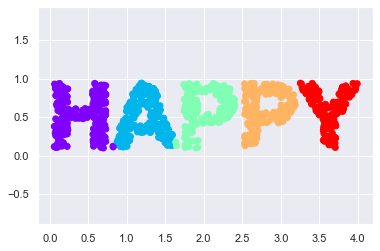

In [11]:
X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))
plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

In [13]:
print(X.shape)

(1000, 2)


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

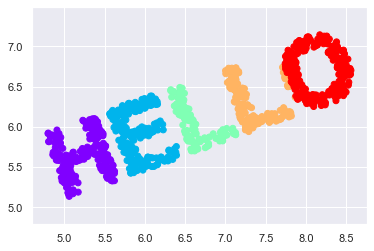

In [24]:
def rotate(X, angle):
    theta = np.deg2rad(angle) #degree to radian
    #컴퓨터의 각도는 라디안으로 사용한다 (컴퓨터는 각도를 못알아들음 라디안으로 사용)
    R = [[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]] #축이 2개인 정방행렬
    #-가 없으면 반대방향으로 돌아간다.(하지만 틀어짐)
    #위의 사인에 -하면 시계반대방향으로 회전
    #지금 회전이 z축으로 돌고있다.(x축이나 y축이 아니다.)
    #[[np.cos(theta), 0, np.sin(theta)],[0,0,0],[-np.sin(theta), 0, np.cos(theta)]] -> y축으로 돈다.
    #지금 끝의 값이 없기 때문에 0 z축으로 도는 것이다.
    return np.dot(X,R)
X2 = rotate(X, 20)+5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

In [26]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) #거리값행렬 = 정방행렬, 대칭행렬이다.(변수로 생성된 행렬이기 때문에)
#공분산, 상관계수 행렬또한 정방행렬, 대칭행렬이다.
print(D.shape)
D[:5,:5]

(1000, 1000)


array([[0.        , 0.34803471, 0.00916819, 0.0450506 , 0.32637768],
       [0.34803471, 0.        , 0.34018159, 0.30337243, 0.0229946 ],
       [0.00916819, 0.34018159, 0.        , 0.03683646, 0.31841895],
       [0.0450506 , 0.30337243, 0.03683646, 0.        , 0.28158646],
       [0.32637768, 0.0229946 , 0.31841895, 0.28158646, 0.        ]])

In [27]:
D2 = pairwise_distances(X2)
np.allclose(D,D2)
#X2 = 회전된 행렬
#기존값과 회전된값의 거리값은 같다. true 유지된다.

True

In [28]:
#MDS를 하면 거리값을 유지하면서 차원축소를 한다.
#MDS는 비교적 원형을 유지하면서 차원축소를 한다.

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


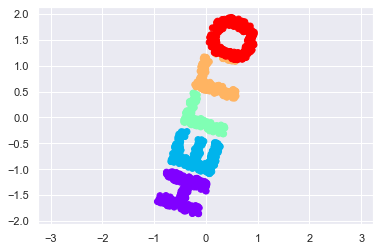

In [31]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) 
#dissimilarity - 거리값, precomputed미리 계산된 거리행렬로 다차원척도법을 진행하겠다.
out = model.fit_transform(D) #D = 거리값행렬
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')
print(out)
#모양을 유지가 되고 방향이 변경되었다.
#x축과 y축이 서로 바뀌었다.

In [36]:
import numpy as np
rng = np.random.RandomState(10)
C = rng.randn(3,3) #랜덤으로 행렬 생성
print(np.dot(C,C.T)) #행렬출력(정방,대칭행렬=거듭제곱하였기 때문에)
e,V = np.linalg.eigh(np.dot(C,C.T)) #아이덴분해(고유값분해) 실시->아이젠벨류, 벡터 반환
print('eigenvector ',V) #정직교하는 축
print('eigenvalue ',e) #축방향으로의 분산값 : 설명력 (큰놈을 고르면 주성분이 된다.)
print(np.dot(V[1],V[2])) #정직교시의 내적 = 0
print(np.dot(V[1],V[0])) #모든축 동일 내적 =0
#행간 잰것이다.
print(np.dot(V[:,0],V[:,1]))
#행, 열간 모두 직교하는 축이다.

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector  [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue  [0.02629875 0.37332691 5.26033253]


2.7755575615628914e-17

In [38]:
#3차원으로 투영하고 있다. projection 시켜주었다.
#원래 데이터의 차수 = [1000,2] 1000개의 데이터 2개의 차수(변수)
def random_projection(X, dimmension=3, rseed=3):
    #차원확대를 하려고 한다.
    assert dimmension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimmension, dimmension) #3*3
    print('C는', C.shape)
    e,V = np.linalg.eigh(np.dot(C,C.T)) #3*3에 정방이면서 대칭인 행렬이 생성된다.
    #축3개 벨류3개가 리턴됨
    #V = 3*3 행렬
    return np.dot(X,V[:X.shape[1]]) #X.shape[1] = 2 -> V[2]
#행렬을 곱하려고 하나의 값을 버렸다.
#[1000,2]*[2,3] -> [1000,3]
X3 = random_projection(X,3)
X3.shape

C는 (3, 3)


(1000, 3)

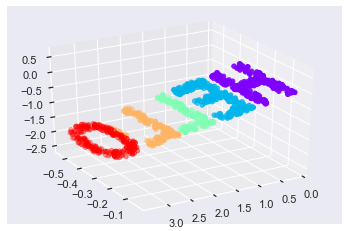

In [40]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d') #도화지를 얻음
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2], **colorize) #x,y,z 을 주고
ax.view_init(azim=60, elev=30) #카메라의 좌우해상, 상하회전값
#3차원으로 차원확대후 시각화

(-1.0390064107727608, 1.03771339899632, -2.064666005451132, 2.1354582444849126)

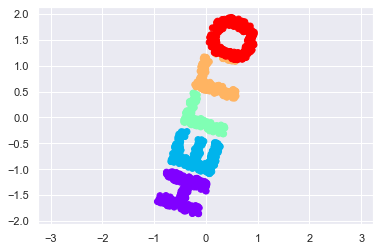

In [42]:
#위의 데이터에 mds 분해를 한다.
model = MDS(n_components=2, random_state=1) #3차원데이터를 2차원으로 축소
#모델 셋팅
out3 = model.fit_transform(X3) #모델에 fit해야지 차원축소
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')
#거리값은 유지하고 차원이 축소되어 표현되었다.

In [51]:
#비선형 변환
def make_hello_s_curve(X):
    t = (X[:,0]-2)*0.75*np.pi #X[:,0]값에 회전값을 주었다.
    x = np.sin(t) #sin값으로 회전하게되고
    y = X[:,1] #y는 그대로
    z = np.sign(t) * (np.cos(t)-1) #sign 이놈의 부호값을 가져와서 cos값으로 회전
    #x에서 sin값을 주고 z값에서 cos값을 줌
    return np.vstack((x,y,z,)).T
XS = make_hello_s_curve(X)

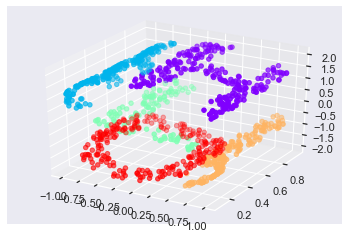

In [52]:
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2],**colorize)
#회전되며 3차원으로 만들어졌다.

(-1.390455632355431,
 1.2493637628504926,
 -2.3855494181659145,
 2.1899859123555574)

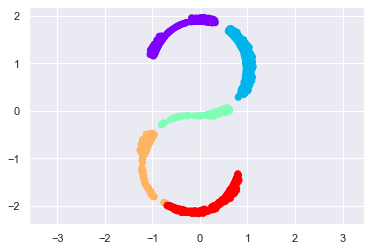

In [55]:
model = MDS(n_components=2, random_state=2)
out2 = model.fit_transform(XS)
plt.scatter(out2[:,0], out2[:,1], **colorize)
plt.axis('equal')
#비선형인 데이터에 대해서 차원축소하였다.
#모양을 유지하지 못했다. -> 비선형에 취약하다.

(0.15, -0.15)

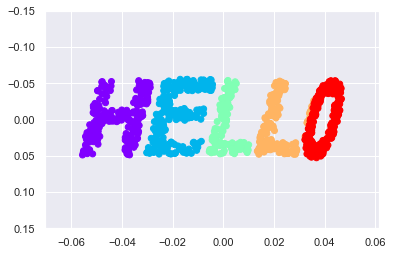

In [57]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)
#비교적 모형을 유지하면서 (비선형을 유지하면서) 차원을 축소한다.

(1.0, -1.0)

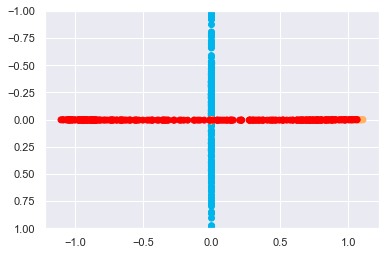

In [59]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(1.0, -1.0)
#isomap은 작 축소하지 못하고 있다.
#isometric mapping

In [61]:
#문제
#iris 데이터(기존4차원 데이터)를 차원 축소하여 2차원, 3차원으로 출력해 보시오.(시각화 해보시오)
import os
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn import manifold, datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

(-3.2688825521989697,
 3.8990414822427386,
 -2.2741549915589223,
 2.7746368820611274)

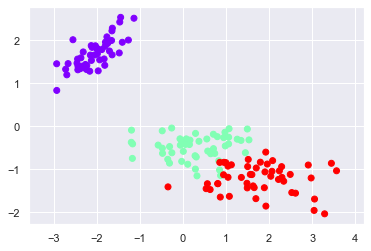

In [65]:
model = MDS(n_components=2, random_state=1) #4차원데이터를 2차원으로 축소
#모델 셋팅
out = model.fit_transform(x) #모델에 fit해야지 차원축소
colorize = dict(c=y, cmap=plt.cm.get_cmap('rainbow'))
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')

(-2.6551257888371707,
 2.466830087991894,
 -2.636195356398077,
 3.0757392823762295)

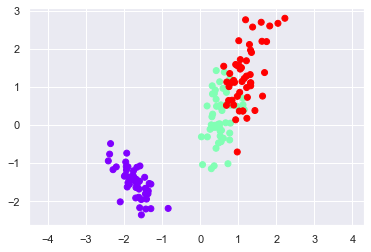

In [73]:
model = MDS(n_components=3, random_state=1) #4차원데이터를 3차원으로 축소
#모델 셋팅
out = model.fit_transform(x) #모델에 fit해야지 차원축소
colorize = dict(c=y, cmap=plt.cm.get_cmap('rainbow'))
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')

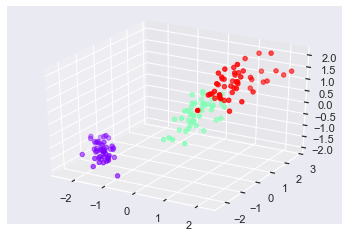

In [69]:
ax = plt.axes(projection = '3d')
ax.scatter3D(out[:,0],out[:,1],out[:,2],**colorize)

In [74]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [77]:
import os
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
from sklearn import manifold, datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

In [88]:
colors = ['r','g','b']
markers = ['o',6,'*']
def plot_iris_plot(X,y,dim):
    fig = plt.figure(figsize=(10,4))
    plt.rcParams['font.family']=[font_name]
    if dim==3:
        ax = fig.add_subplot(121, projection='3d')
        ax.set_facecolor('white')
        mds = manifold.MDS(n_components=3)
        Xtrans = mds.fit_transform(X)
        for cl, color, marker in zip(np.unique(y), colors, markers):
            ax.scatter(
            Xtrans[y==cl][:,0], Xtrans[y==cl][:,1], Xtrans[y==cl][:,2], c=color, marker=marker, edgecolor='black')
            ax.set_title('3차원 MDS')
            ax.view_init(10,-15)
    if dim==2:
        mds = manifold.MDS(n_components=2)
        Xtrans = mds.fit_transform(X)
        fig = plt.figure(figsize=(10,4))
        ax = fig.add_subplot(122)
        for cl, color, marker in zip (np.unique(y), colors, markers):
            ax.scatter(Xtrans[y==cl][:,0], Xtrans[y==cl][:,1], c=color, marker=marker, edgecolor='black')
            ax.set_title('2차원에서 MDS')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


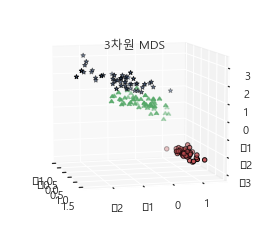

In [91]:
plot_iris_plot(x,y,3)
#각도를 어떻게 조절한다는 것?

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

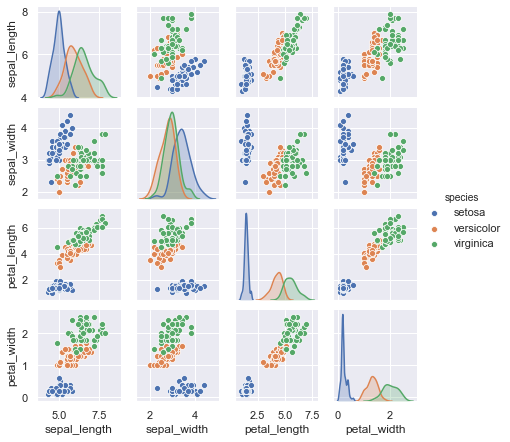

In [98]:
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species', height=1.5)
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


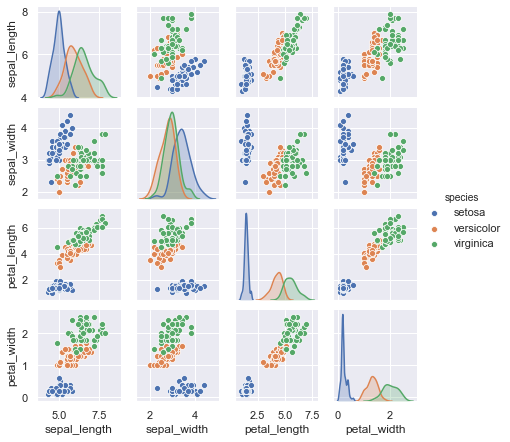

In [104]:
import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris, hue='species', height=1.5)
from sklearn.decomposition import PCA
X_iris = iris.iloc[:,:4]
model = PCA(n_components=2) #2개의 특성 추출
model.fit(X_iris)

X2D = model.transform(X_iris) #원래의 데이터를 특성축으로 변환하였다.

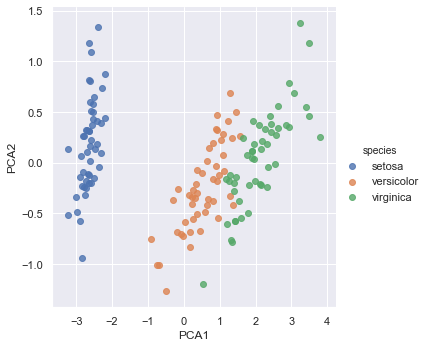

In [106]:
iris['PCA1']= X2D[:,0]
iris['PCA2']= X2D[:,1]
sns.lmplot('PCA1','PCA2', hue='species', data=iris, fit_reg=False) #선형회귀를 출력하는 모델이지만 fit_reg=False -> scatter같아짐
#pca로 차원축소후 출력

In [107]:
#pca 와 mds 의 차이점
    #mds 는 임의의 축으로
    #pca 는 데이터의 분산으로 결정된 축으로 재변환되어 표현된다. (데이터의 원래 모양으로 복원이 가능)

In [110]:
import numpy as np
np.random.seed(1)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1 #원래의 데이터에 노이즈를 추가하였다.
angles = np.random.rand(m)*3*np.pi / 2-0.5
x = np.empty((m,3))
x[:,0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.rand(m)/2
x[:,1] = np.sin(angles)*0.7 + noise*np.random.rand(m)/2
x[:,2] = x[:,0]*w1 + x[:,1]*w2 + noise*np.random.randn(m) #앞의 두놈이 이놈을 설명하고 있다.

In [111]:
x.shape

(60, 3)

In [113]:
import pandas as pd
df = pd.DataFrame(x, columns=['$x_1$', '$x_2$', '$x_3$']) #데이터갯수60개 열개수3개
df.head(10)

,$x_1$,$x_2$,$x_3$
0,0.607760,0.697093,0.146898
1,-0.826595,0.172555,0.024161
2,0.673085,-0.333851,0.046434
3,1.021999,0.571222,0.211214
4,1.079405,0.176282,0.212883
5,0.992282,-0.018432,-0.020735
6,1.147100,0.285809,0.280639
7,0.905704,0.674716,0.297642
8,0.736878,0.692106,0.262662
9,0.024106,0.638589,0.183813


In [115]:
X_cen = x-x.mean(axis=0) #평균을 뺀값
X_cov = np.dot(X_cen.T, X_cen) #두개의 데이터를 거듭제곱 형식으로 각 내적을 구하였다.
print(X_cov) #데이터의 공분산

[[45.57319201  8.32345929  5.58624781]
 [ 8.32345929  8.82776093  3.15035746]
 [ 5.58624781  3.15035746  1.72547265]]


In [116]:
#공분산을 구한것에 대해 고유값 분해를 하였다.
w,v = np.linalg.eig(X_cov)
print('eigenvalue : ', w) #고유값 = 설명력(얼마나 설명하고 있는지)
print('eigenvector : ', v) #고유벡터

eigenvalue :  [48.17987527  7.56284476  0.38370557]
eigenfactor :  [[ 0.96775345  0.24363514 -0.06399365]
 [ 0.21517648 -0.93163199 -0.29284964]
 [ 0.13096699 -0.26963632  0.95401462]]


In [117]:
print('설명력 : ', w/w.sum())
#마지막놈이 가장 낮은 이유는 데이터를 생성할 때 이미 앞의 두놈에 의해서 생성되었기 때문이다.

설명력 :  [0.85841695 0.1347466  0.00683645]


In [118]:
#PCA는 일반성을 띄기 위해서 : 고유값분해 -> SVD(singular value decomposition) 특이행렬분해로 구현해 놓았다.
#고유값 분해와 특이행렬분해의 차이점
    #고유값은 정방행렬에 실행하고
    #특이행렬은 비정방행렬에 실행한다.
    #고유값분해는 특이행렬분해의 특별한 경우에 해당된다. 특이행렬분해는 고유값분해를 포함한다.

In [120]:
U,D,V_t = np.linalg.svd(X_cen) #3개의 값이 리턴된다.
#m*n의 행렬
#U = m*m
#V_t = n*n
print('singular value : ', D)
print('singular vector : ', V_t.T) #전치행렬 - 고유값분해의 고유벡터와 같은 결과값을 가진다.
print('-')
print(U)

singular value :  [6.94117247 2.75006268 0.61943972]
singular vector :  [[-0.96775345 -0.24363514  0.06399365]
 [-0.21517648  0.93163199  0.29284964]
 [-0.13096699  0.26963632 -0.95401462]]
-
[[-0.07416991  0.13582571  0.19795    ... -0.10321917  0.03944928
   0.10631305]
 [ 0.14438749  0.07316857 -0.00918421 ...  0.1121678  -0.19316683
  -0.11278116]
 [-0.04942272 -0.22906221 -0.12796849 ... -0.05940169 -0.08550812
   0.06465444]
 ...
 [-0.12897639 -0.09616779 -0.01226689 ...  0.97640006  0.01957347
   0.02415513]
 [ 0.04603669  0.16614951 -0.12930095 ...  0.01713988  0.95457755
  -0.0167698 ]
 [ 0.13323197  0.09687612  0.01653356 ...  0.0242598  -0.01935826
   0.97515003]]


In [121]:
#특이행렬분해의 설명력 보는법
print('설명력 : ', D**2/np.sum(D**2)) 
#왼쪽행렬, 오른쪽행렬을 쪼갰다고 생각해서 반값으로 나오기 때문에 제곱해 주어야 원래 설명력이 나온다.
#나중에 원래값으로 복원하려면 3개의 리턴값을 모두 곱해야 한다.(그래서 두번곱해서 따블이 되지 않기 위해 반반 쪼개져있다.)

설명력 :  [0.85841695 0.1347466  0.00683645]


In [122]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [124]:
print('singular value : ',pca.singular_values_)
#SVD와 값이 같게 나온다.

singular value :  [6.94117247 2.75006268 0.61943972]


In [125]:
print('singular value : ',pca.components_.T) #SVD의 오른쪽 행렬값과 같다.
#정직교축을 의미한다.

singular value :  [[-0.96775345  0.24363514  0.06399365]
 [-0.21517648 -0.93163199  0.29284964]
 [-0.13096699 -0.26963632 -0.95401462]]


In [126]:
print('설명력', pca.explained_variance_ratio_)
#새로운 축에대한 설명력

설명력 [0.85841695 0.1347466  0.00683645]


In [129]:
pc1 = v[:,0] #v = vector값(고유벡터 3*3중 첫번째 열의값) - 각각의 열은 직교한다.
proj1 = np.dot(x, pc1) 
#축방향으로 내적을 내게되면 투영이 벌어진다.(1사이즈를 가진놈하고 원래데이터와 내적을 내면 축으로 투영된 값이 나온다.)
#축으로 내적을 낸다는 것이다.
#그것의 분산을 구하면 고유값이 된다.

#각열의 축으로 투영을 시키면 고유값이 된다.(축은 사이즈가 1)

pc2 = v[:,1]
proj2 = np.dot(x, pc2)

pc3 = v[:,2]
proj3 = np.dot(x, pc3)

proj_list = np.array([proj1.var(), proj2.var(), proj3.var()])
print('eigenvalue : ', proj_list)
print('설명력 : ', proj_list/proj_list.sum()) 

eigenvalue :  [0.80299792 0.12604741 0.00639509]
설명력 :  [0.85841695 0.1347466  0.00683645]


In [132]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
print('선택할 차원수 : ', d)

선택할 차원수 :  2


In [136]:
pca = PCA(n_components = 0.95)
x_proj = pca.fit_transform(x)
print('principal component vector ', pca.components_.T) #전치한값을 사용하여야 한다.
#components = 직교축을 의미한다.

principal component vector  [[-0.96775345  0.24363514]
 [-0.21517648 -0.93163199]
 [-0.13096699 -0.26963632]]


In [139]:
import mglearn

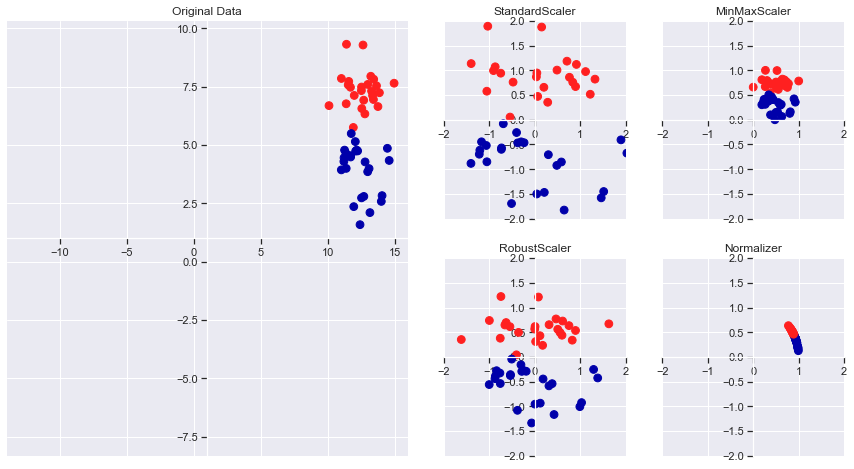

In [140]:
mglearn.plots.plot_scaling()
#오리지널 데이터가 양수로 퍼져있다.
#스탠다드 - 평균이 0으로 온다.
#로버트 견고하다 분포가 더 작다.
#minmax 양수로 표시된다.
#노멀라이즈 원점으로 부터의 방향값으로 표시된다.(사이즈 = 1)

In [142]:
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.explained_variance_ratio_) #나눠준놈
print(pca.explained_variance_) #각 컴포넌트에 대한 분산값
print(pca.mean_)
print(pca.n_components_)
print(pca.noise_variance_)

[0.99244289 0.00755711]
[7.93954312 0.06045688]
[0. 0.]
2
0.0


In [146]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('테스트세트 정확도 : {:.2f}'.format(svm.score(X_test, y_test)))

테스트세트 정확도 : 0.94


In [150]:
svm.fit(X_train_scaled, y_train)
print('스케일조정된 테스트세트 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))
#스케일 해주면 정확도가 올라간다.

스케일조정된 테스트세트 정확도 : 0.97


In [154]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [163]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_) #뒤에 쭉있는데 두개로 짤랏으니까 설명력중 일부만 취하고 있는것이다.
#합이 1이 안되는 이유

[0.44272026 0.18971182]


[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


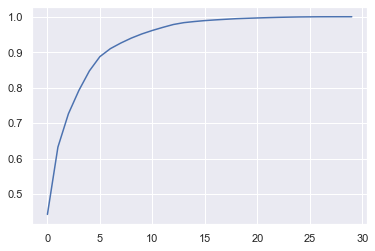

In [169]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#설명력이 이미 10~15정도 되어지면 1에 가깝기 때문에 이 뒤로는 노이즈로 취급할 수 있다.

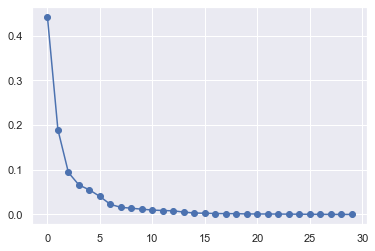

In [172]:
plt.plot(pca.explained_variance_ratio_, 'bo-')
#종속변수에 영향을 미친놈은 7개 정도 된다.

In [173]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=6) #6,7개적당
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print('SVM 테스트 정확도 : {:.2f}'.format(svm.score(X_t_test, y_test)))
#100퍼센트를 목표로하지만 96도 좋은수준

SVM 테스트 정확도 : 0.96


([<matplotlib.axis.XTick at 0x2eef16d3d08>,
 <a list of 30 Text xticklabel objects>)

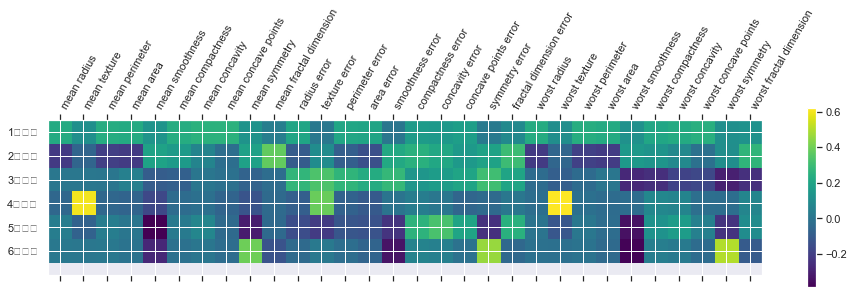

In [177]:
#축에 관한 값
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2,3,4,5,6],['1주성분','2주성분','3주성분','4주성분','5주성분','6주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

In [178]:
#하나의 축을 결정할때 여러개의 변수가 영향을 미쳐서 축이 결정된다.
#변수이름을 재명명한다.(축이 새롭개 30개의 축이 만들어짐, 변수 하나의 값이아닌 여러변수의 값으로 만들어진 축이다. 이를 재명명해야한다.)
#도메인 날리지를 갖고있는 사람이 새로운축의 이름을 명명할 수 있다.
#왜냐하면 영향을 많이주는 변수들의 관계를 알 수 있기 떄문에(분석에서는 그것을 알지 못한다.)

In [179]:
import cv2

In [199]:
img = cv2.imread('tree.jpg', cv2.IMREAD_GRAYSCALE)

In [200]:
U,S,V = np.linalg.svd(img)

In [201]:
print(U.shape, S.shape, V.shape)

(866, 866) (866,) (866, 866)


In [202]:
U[:,:comps[i]].shape

(866, 600)

In [203]:
np.diag(S[:comps[i]]).shape

(600, 600)

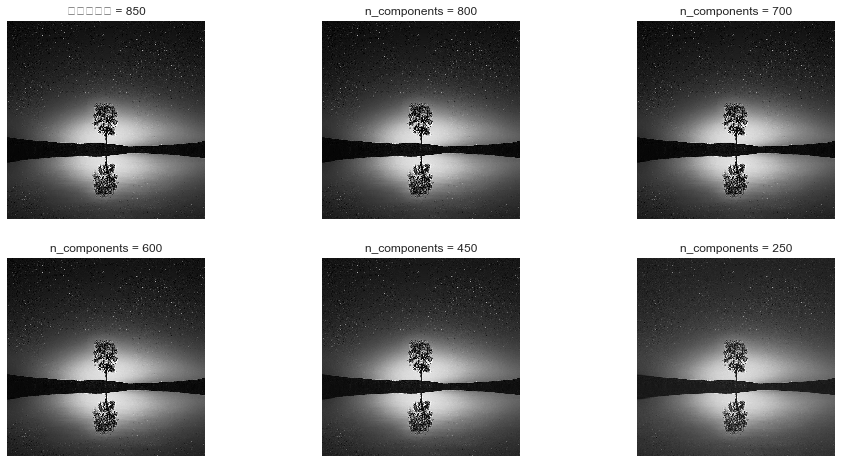

In [205]:
comps = [850, 800, 700, 600, 450, 250]
plt.figure(figsize=(16,8))
for i in range(6):
    low_rank = U[:,:comps[i]]@ np.diag(S[:comps[i]]) @ V[:comps[i],:]
    if (i==0):
        plt.subplot(2,3,i+1), plt.imshow(low_rank, cmap='gray'), plt.axis('off'), plt.title('원본이미지 = '+str(comps[i]))
    else:
        plt.subplot(2,3,i+1), plt.imshow(low_rank, cmap='gray'), plt.axis('off'), plt.title('n_components = '+str(comps[i]))
        #kmeans 와는 다르게 원본을 보존하는 능력이있다.(축소하여도 특성을 그대로 가진다.)